# Temat 1: Wprowadzenie - perceptron

# Obiektowa implementacja metody perceptronu

In [2]:
import numpy as np  # Wykorzystana do przekształceń z tablicami oraz do generowania liczb losowych


class Perceptron:
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
      Bias unit after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):  # Metoda __init__ - konstruktor klasy
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)  # Generator liczb losowych NumPy, zainicjalizowany przez użytkownika
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])  # Inicjalizacja wag z rozkładu normalnego
        #self.w_ = np.zeros(shape=X.shape[1], dtype=float)  # Inicjalizacja wag zerami (dla uproszczenia
        self.b_ = np.float_(0.)  # Ustawienie wartości wyrazu wolnego na 0
        
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):  # Oblicza całkowite wejście (suma ważona cech i wyrazu wolnego)
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_  # np.dot liczy iloczyn wektorów

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)  # Jeśli wynik z net_input >= 0, przypisuje etykietę klasy 1, w p.p. 0

## Budowa modelu perceptronu na danych Iris

In [3]:
import os
import pandas as pd

try:
    s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
    print('From URL:', s)
    df = pd.read_csv(s,
                     header=None,  # Plik nie zawiera wiersza nagłówkowego z nazwami kolumn
                     encoding='utf-8')  # Określa kodowanie znaków pliku
    
except HTTPError:
    s = 'iris.data'
    print('From local Iris path:', s)
    # Wczytanie danych z lokalnej ścieżki:
    df = pd.read_csv(s,
                     header=None,
                     encoding='utf-8')

/Users/jedrzejsarna/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [4]:
import numpy as np

# Wydzielamy dwa gatunki (setosa oraz versicolor):
y = df.iloc[0:100, 4].values  # Wybiera wiersze od 0 do 99 i 5-tą kolumnę
                              # Metoda .values konwertuje tę kolumnę na tablicę NumPy
y = np.where(y == 'Iris-setosa', 0, 1)

# Wydzielamy dwie cechy (sepal length oraz petal length):
X = df.iloc[0:100, [0, 2]].values

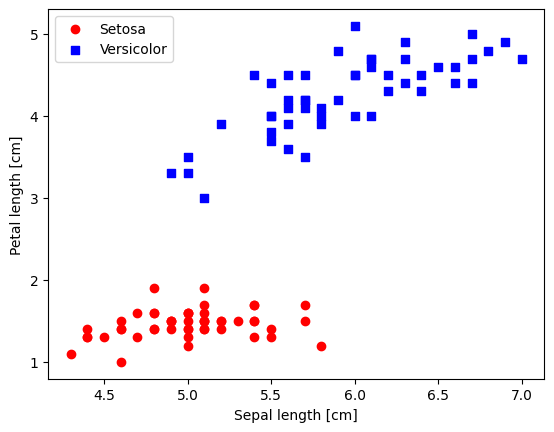

In [5]:
# %matplotlib inline
import matplotlib.pyplot as plt

# Wykres rozrzutu wybranych danych:
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='Setosa')

plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='s', label='Versicolor')

plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')

plt.show()

### Budowa (uczenie) modelu perceptronu

Budujemy model perceptronu oraz rysujemy wykres liczby błędów (błędnie sklasyfikowanych przykładów) dla kolejnych epok uczenia modelu.

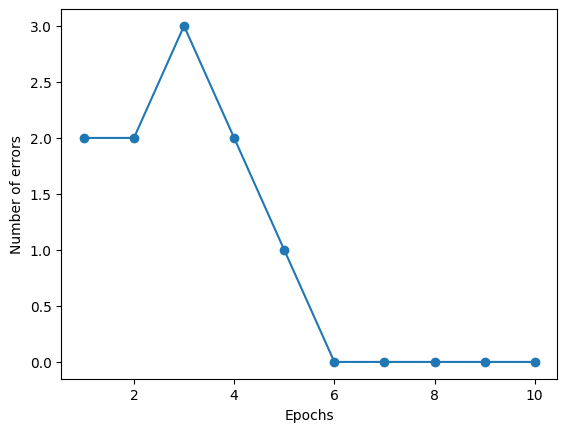

In [6]:
ppn = Perceptron(eta=0.1, n_iter=10)  # Tworzymy instancję klasy Perceptron

ppn.fit(X, y)  # Za pomocą metody fit uczeymy model perceptronu

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of errors')  # Number of errors = Number of updates

plt.show()

### Wizualizacja obszarów decyzyjnych klasyfikatora

Poniższy kod przedstawia implementację funkcji, która wizualizuje granicę decyzyjną klasyfikatora dla dwuwymiarowej przestrzeni cech.

In [7]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):  # resolution - rozmiar kroku siatki do wizualizacji przestrzeni

    # Definiujemy listy markerów i kolorów, które będą używane do reprezentowania różnych klas na wykresie:
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    # Tworzymy mapę kolorów ListedColormap na podstawie kolorów określonych w colors. 
    # cmap to obiekt, który Matplotlib używa do mapowania liczb na kolory
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Wykres obszarów decyzyjnych:
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1  # Określamy zakresy wartości dla obu cech (-/+ 1)
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))  # Tworzymy dwuwymiarową siatkę punktów do wizualizacji przestrzeni cech
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)  # Liczymy predykcje dla każdego punktu siatki
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)  # Rysowanie konturu granic decyzyjnych
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())  # Ustawiono granice osi wykresu

    # Rysowanie przykładów z rozważanych klas:
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

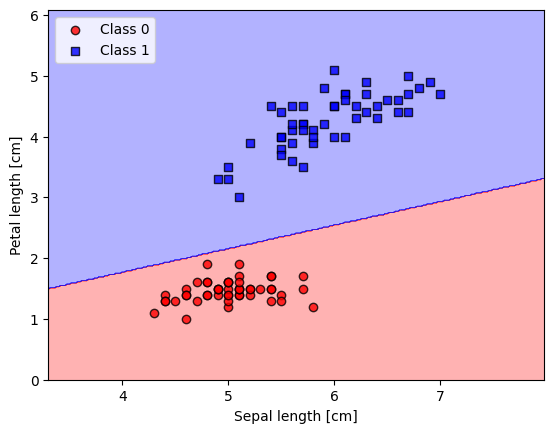

In [8]:
# Generujemy wykres dla naszego modelu perceptronu:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')

plt.show()

# Zadanie 1.1

In [9]:
import numpy as np  # Wykorzystana do przekształceń z tablicami oraz do generowania liczb losowych


class Perceptron_changed:
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
      Bias unit after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):  # Metoda __init__ - konstruktor klasy
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(shape=X.shape[1], dtype=float)  # Inicjalizacja wag zerami
        self.b_ = np.float_(0.)  # Ustawienie wartości wyrazu wolnego na 0
        
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):  # Oblicza całkowite wejście (suma ważona cech i wyrazu wolnego)
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_  # np.dot liczy iloczyn wektorów

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)  # Jeśli wynik z net_input >= 0, przypisuje etykietę klasy 1, w p.p. 0

In [10]:
eta=[0.5,0.2,0.1,0.01,0.001]

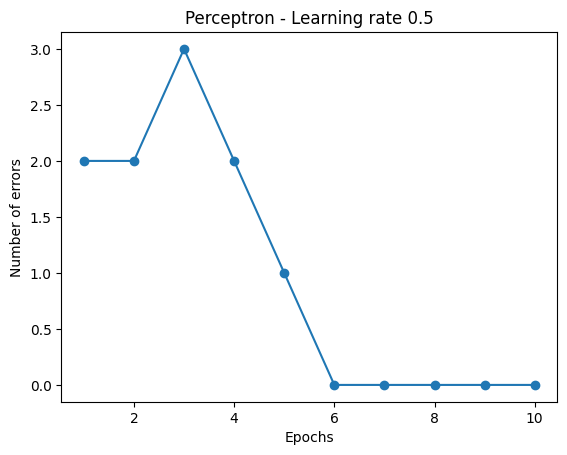

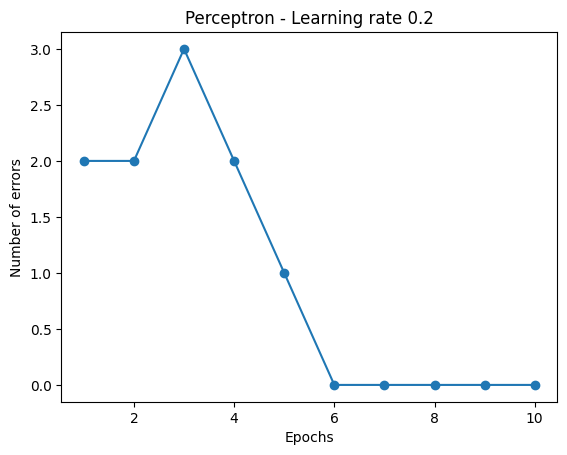

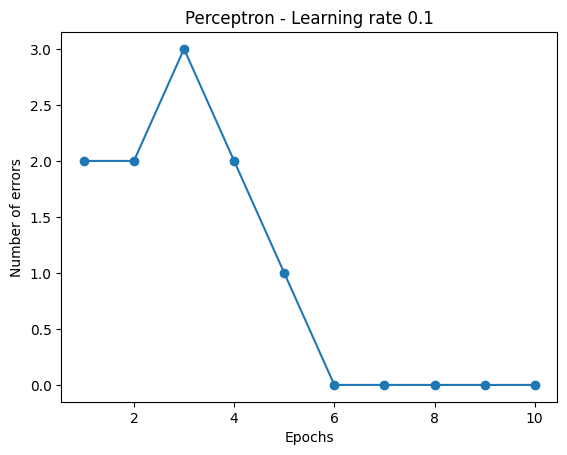

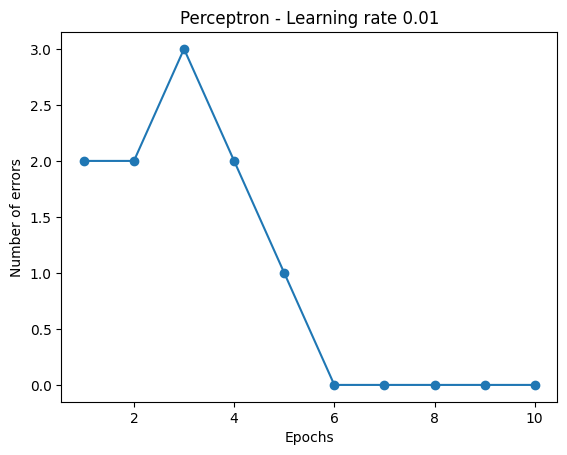

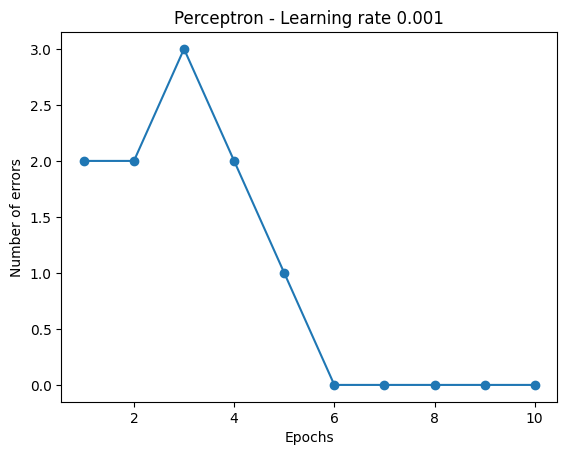

In [11]:
for i in range(len(eta)):
    ppn_changed = Perceptron_changed(n_iter=10, eta=eta[i]).fit(X, y)
    plt.plot(range(1, len(ppn_changed.errors_) + 1), ppn_changed.errors_, marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Number of errors')  # Number of errors = Number of updates
    plt.title(f'Perceptron - Learning rate {eta[i]}')
    plt.show()

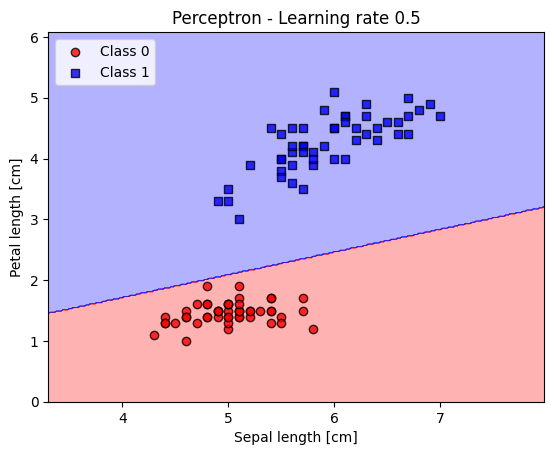

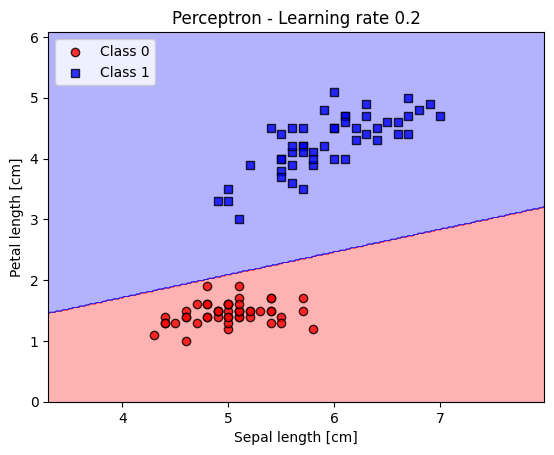

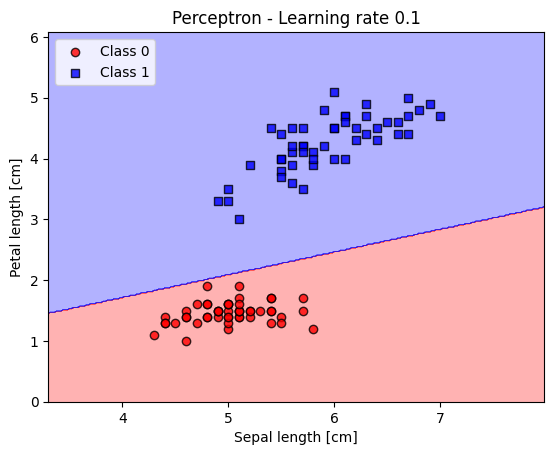

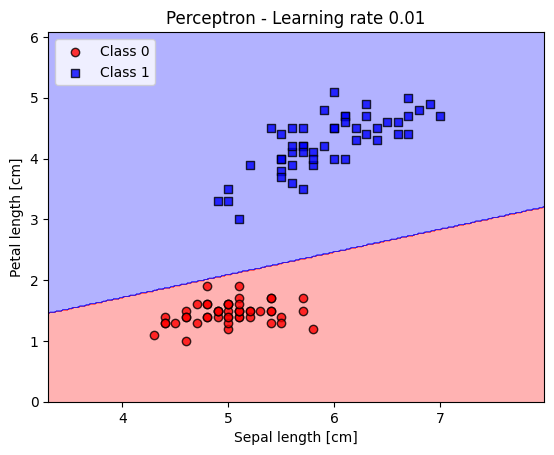

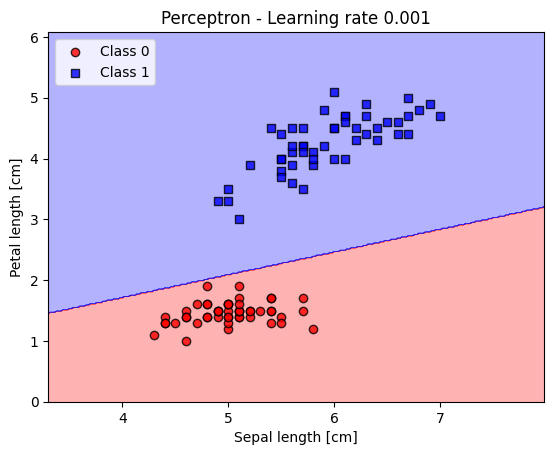

In [12]:
for i in range(len(eta)):
    ppn_changed = Perceptron_changed(n_iter=10, eta=eta[i]).fit(X, y)
    # Generujemy wykres dla naszego modelu perceptronu:
    plot_decision_regions(X, y, classifier=ppn_changed)
    plt.xlabel('Sepal length [cm]')
    plt.ylabel('Petal length [cm]')
    plt.legend(loc='upper left')
    plt.title(f'Perceptron - Learning rate {eta[i]}')


    plt.show()

## Jak w tym przypadku w zależności od wartości parametru $\eta$ zmienia się postać modelu?

Postać modelu nie zmienia się co widać na powyzszych wykresach. Krótkie wyjaśnienie: 

Ogólnie dla kazdego z $i$ przykladow mamy

$z = w_1^i  x_1^i + w_2^i  x_2^i + b^i$

jezeli $w_1^0$, $w_2^0$ i $b^0$ to $0$ to w pierwszym kroku dla pierwszego przykładu $z=0$. Funkcja decyzyjna $\sigma(z)$ zwraca zatem $\hat{y}^0=1$.

Ogólnie mamy
$$
w_j := w_j + \Delta w_j \quad \text{oraz} \quad b := b + \Delta b,
$$
oraz
$$
\Delta w_j = \eta(y^{(i)} - \hat{y}^{(i)})x_j^{(i)} \quad \text{oraz} \quad \Delta b = \eta(y^{(i)} - \hat{y}^{(i)});
$$

Zatem w tym przypadku, jak $y^0=0$ to:
$$
\Delta w_j = \eta(0 - 0)x_j^{(i)} \quad \text{oraz} \quad \Delta b = \eta(0 - 0);
$$
Czyli:
$$
w_j = w_j  \quad \text{oraz} \quad b = b 
$$

Jak $y^0=1$ to:
$$
\Delta w_j = \eta(1 - 0)x_j^{(i)} \quad \text{oraz} \quad \Delta b = \eta(1 - 0);
$$
Czyli:
$$
w_j = w_j + \eta x_j^{(i)}  \quad \text{oraz} \quad b = b + \eta 
$$

Dalsze przyklady maja dodatkowe mozliwosci (przewiduje 0, prawdziwa etykieta to 1), ale to zmienia tylko znaki przy aktualizacjach wag.

Rozpisujac, przy pierwszym przykladzie

$z = w_1^0  x_1^0 + w_2^0  x_2^0 + b^0$

i mamy $z=0$.

Przy drugim przykładzie po aktualizacjach wag mozemy mieć 
$$
z=0 \quad \text{lub} \quad z = w_1^1  x_1^1 + w_2^1  x_2^1 + b^1 = (w_1^0 + \eta x_1^0) x_1^1 + (w_2^0 + \eta x_2^0)x_2^1 + b^0+\eta = \eta x_1^0 x_1^1 + \eta x_2^0 x_2^1 + \eta = \eta(x_1^0 x_1^1 + x_2^0 x_2^1 + 1)
$$

Dalsze przykłady mozna tak samo rozpisac, wyciagajac na koncu $\eta$ przed nawias. Zatem skoro $\eta$ z przedziału $(0,1)$ to nie wplywa na znak, zatem nie wplywa na funkcje decyzyjna $\sigma(z)$.

# Zadanie 1.2

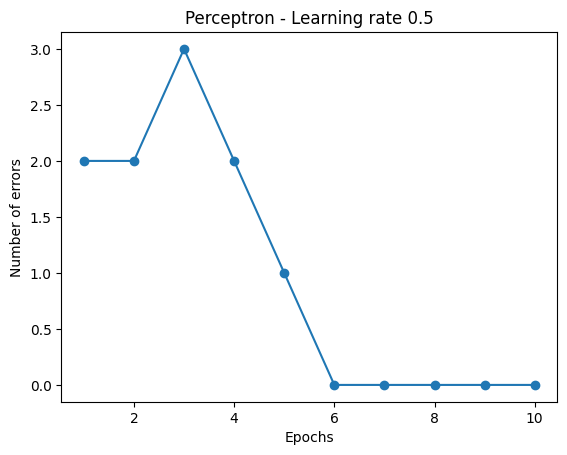

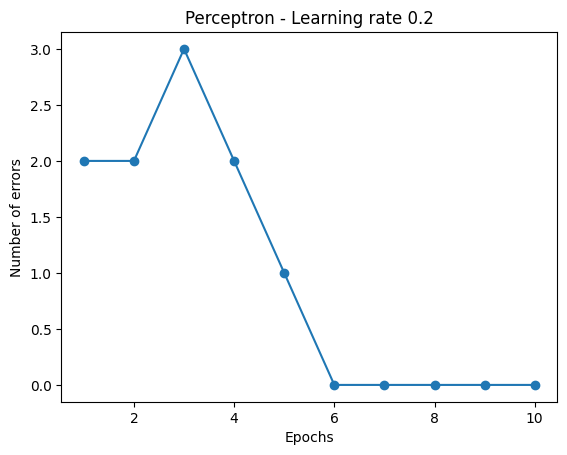

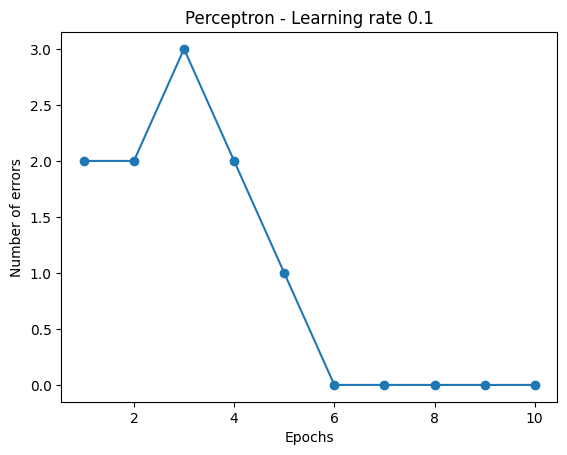

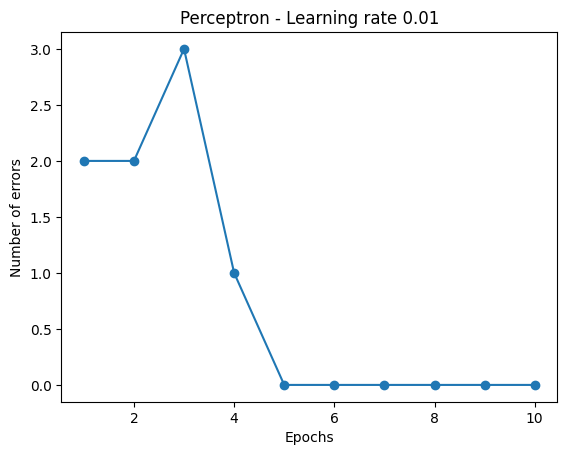

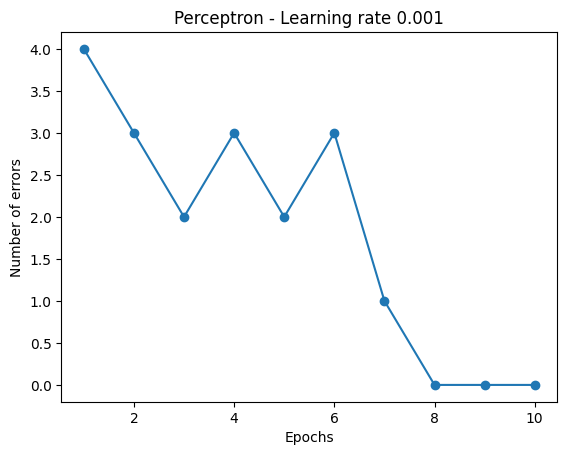

In [14]:
for i in range(len(eta)):
    ppn = Perceptron(n_iter=10, eta=eta[i]).fit(X, y)
    plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Number of errors')  # Number of errors = Number of updates
    plt.title(f'Perceptron - Learning rate {eta[i]}')
    plt.show()

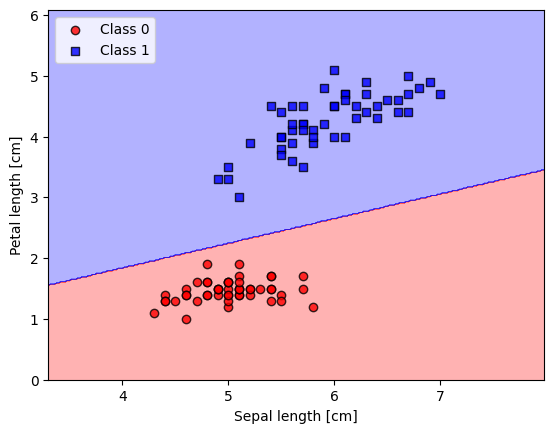

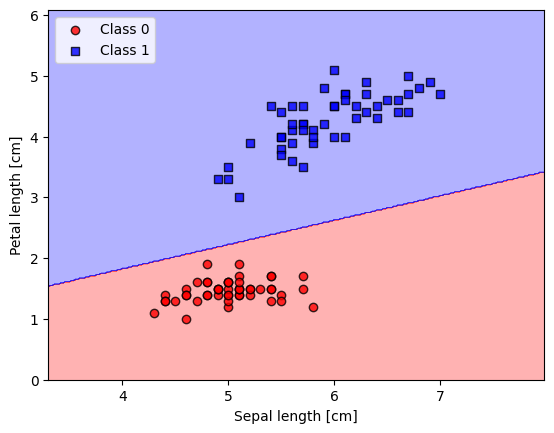

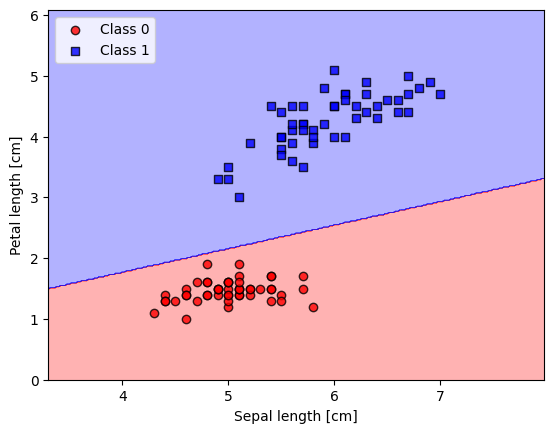

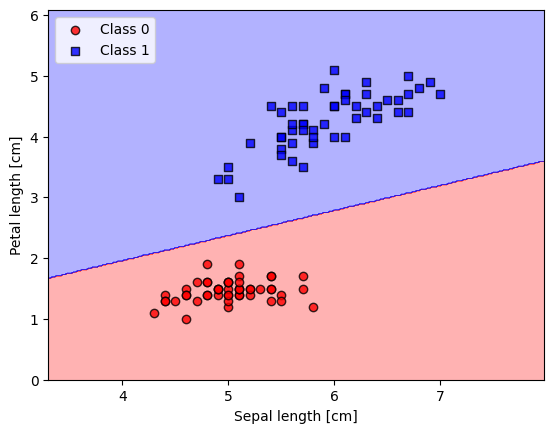

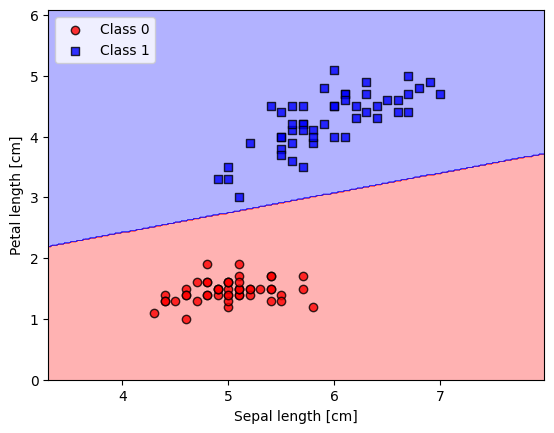

In [15]:
for i in range(len(eta)):
    ppn = Perceptron(n_iter=10, eta=eta[i]).fit(X, y)
    # Generujemy wykres dla naszego modelu perceptronu:
    plot_decision_regions(X, y, classifier=ppn)
    plt.xlabel('Sepal length [cm]')
    plt.ylabel('Petal length [cm]')
    plt.legend(loc='upper left')

    plt.show()

Tutaj widac, ze parametr $\eta$ ma znaczenie, dla $\eta = 0.01$ model nie popełnił juz błędu przy 5 epoce. W tym wypadku parametr ma juz wplyw na aktualizacje wag, bo wtedy rozpisujac bedziemy mieli cos rodzaju 
$$
z = waga.poczatkowa + \eta(jakies.wyrazenie)
$$

i wtedy $\eta$ moze wplynac na znak $z$ zatem na funkcje decyzyjna.

# Zadanie 1.3

In [16]:
seed = [1,2,3,4,5,10,1234,100,78]

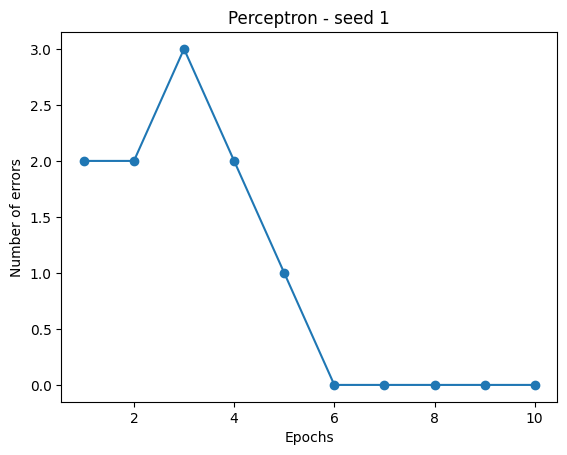

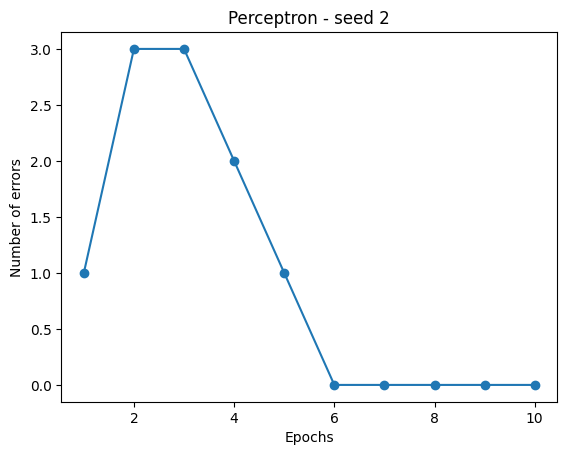

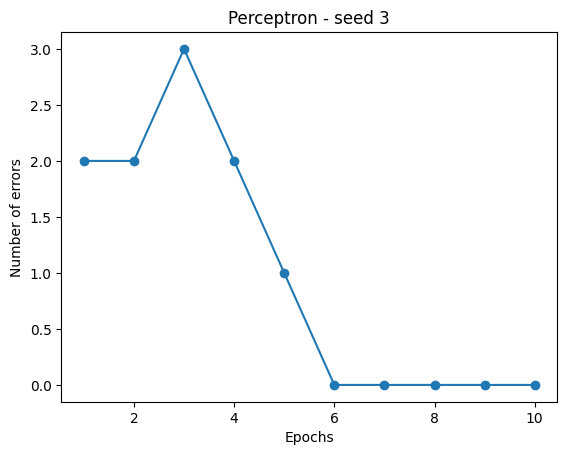

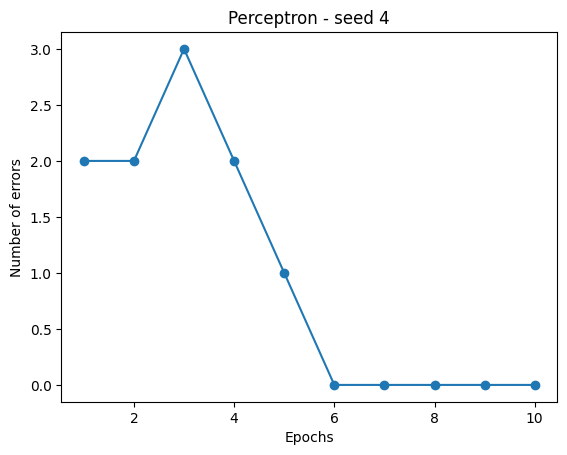

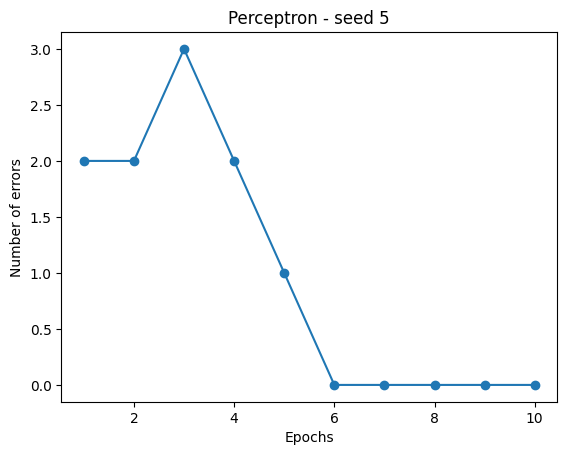

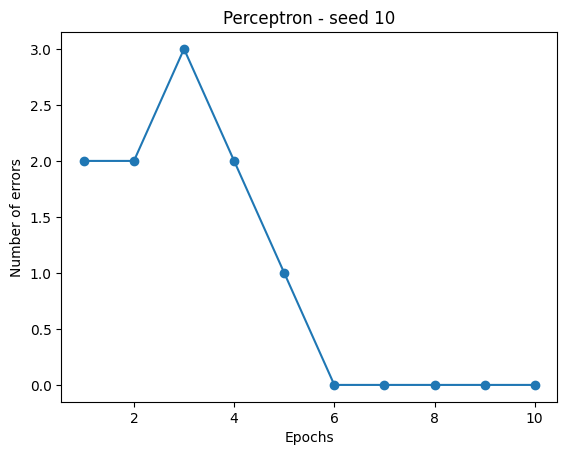

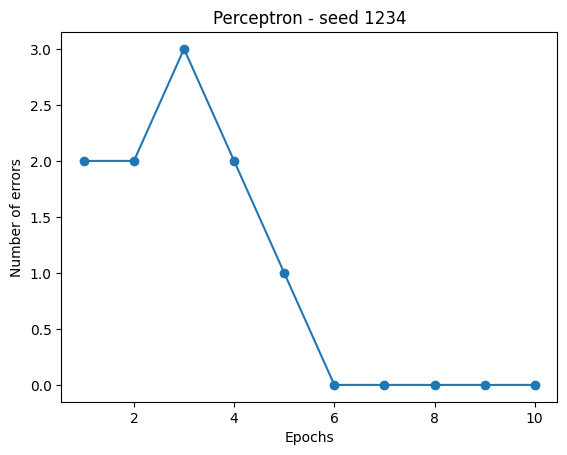

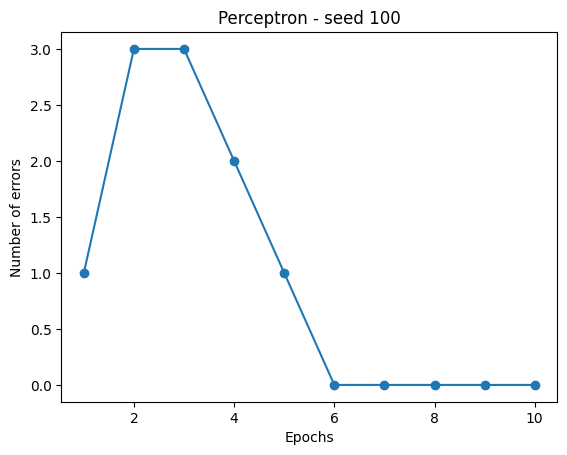

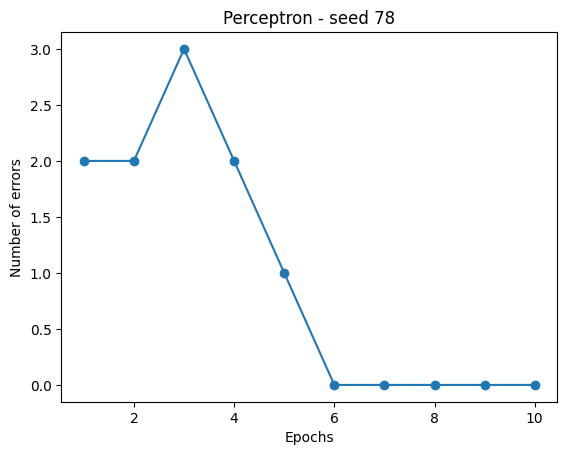

In [17]:
for i in range(len(seed)):
    ppn = Perceptron(n_iter=10, eta=0.1, random_state=seed[i]).fit(X, y)
    plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Number of errors')  # Number of errors = Number of updates
    plt.title(f'Perceptron - seed {seed[i]}')
    plt.show()

 Wnioski: Metoda niezaleznie od zainicjalizowanych wag, zawsze zbiega przy 6 epoce (osiaga 0 bledow)